In [13]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [14]:
#Created Correlation Matrix and heatmap, see corr_matrx.py file
#list of ETFs
tickers = ['VTI','GLD','BND','VT','IYR','AIA','VEU','AAXJ','ILF','EZU','EEM','FM','VWO','UUP','GSG', 'BWX']

In [15]:
#Choose Dates
START_DATE = '2013-03-31'
END_DATE = '2023-03-31'

In [16]:
#monthly simple returns
df = yf.download(tickers, start=START_DATE, end=END_DATE)['Adj Close']\
 .resample('D') \
 .last() \
 .pct_change() \
 .dropna()

[*********************100%***********************]  16 of 16 completed


In [17]:
#create correlation matrix and iterate over matrix to print final output for top correlation pairs in rank order. function called at end of script
def corrank(X: df):
        import itertools
        df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
        print(df.sort_values(by='corr',ascending=False).head(20)[['pairs', 'corr']])

In [18]:
#setup heat map design
cmap = sns.diverging_palette(220, 150, as_cmap=True)

In [19]:
#mask redundancy
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
np.fill_diagonal(mask, False)


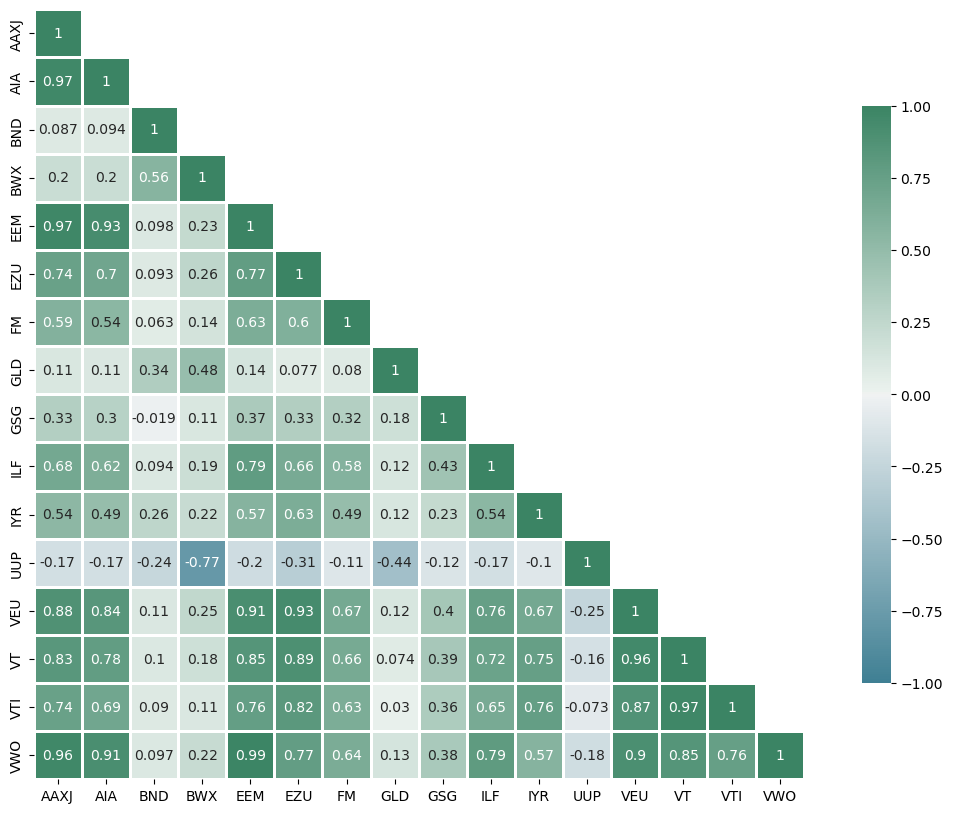

In [20]:
#refine heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
        data=df.corr(), linewidths=1,  #width of lines separating the matrix cells
        square=True,cmap=cmap,
        vmax=1,  #define the max of corr scale
        vmin=-1, #define the min of corr scale
        center=0, cbar_kws={"shrink": .75}, mask=mask, annot=True)
plt.show()

In [21]:
pair = ['VT', 'EEM'] #choose pair from terminal output (I chose lower correlation)
#choose dates
START_DATE = '2013-03-31'
END_DATE = '2023-03-31'

In [22]:
#pull data and calculate returns
x = yf.download(pair, start=START_DATE, end=END_DATE)['Adj Close']\
 .resample('D') \
 .last() \
 .pct_change() \
 .dropna()

[*********************100%***********************]  2 of 2 completed


In [23]:
y = x.pop('VT') #y is long position. you must type this in.
x = sm.add_constant(x) #short position
model = sm.OLS(y, x).fit() #OLS regression
model.summary() #regression output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     VT   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     9603.
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:32:38   Log-Likelihood:                 14381.
No. Observations:                3650   AIC:                        -2.876e+04
Df Residuals:                    3648   BIC:                        -2.875e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   7.79e-05      2.399      0.016    3.42e-05       0.000
EEM            0.6934      0.007     97.994      0.000       0.680       0.707
==============================================================================
Omnibus:                      536.928   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8273.917
Skew:                           0.005   Prob(JB):                         0.00
Kurtosis:                      10.376   Cond. No.                         90.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
coef = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0] #read html rendered regression table to pandas df
m = coef['coef'].values[1] #pull est. slope from regression df

wt_y = 1/(1-m) #optimal weight for long position
wt_x= 1-wt_y #optimal weight for short position

print(f'Estimated optimal weights for pair-trade: {wt_y} long position and {wt_x} short position')

Estimated optimal weights for pair-trade: 3.2615786040443577 long position and -2.2615786040443577 short position
